## About Data
1. Problem defition
How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how much similar bulldozers have been sold for?

2. Data
The data is downloaded from the Kaggle Bluebook for Bulldozers competition: https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are 3 main datasets:

Train.csv is the training set, which contains data through the end of 2011. Valid.csv is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard. Test.csv is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

In [6]:
pip install matplotlib

                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB ? eta -:--:--
                                              0.0/7.6 MB 326.8 kB/s eta 0:00:24
                                              0.1/7.6 MB 581.0 kB/s eta 0:00:13
                                              0.1/7.6 MB 708.1 kB/s eta 0:00:11
     -                                        0.2/7.6 MB 901.1 kB/s eta 0:00:09
     -                                        0.3/7.6 MB 930.9 kB/s eta 0:00:08
     -                                        0.4/7.6 MB 1.0 MB/s eta 0:00:07
     --                                       0.4/7.6 MB 1.1 MB/s eta 0:00:07
     --                                       0.5/7.6 MB 1.1 MB/s eta 0:00:07
     --                                       0.6/7.6 MB 1.2 MB/s eta 0:00:06
     ---                                      0.6/7.6 MB 1.2 MB/s eta 0:00:06
     ---                                      0.7/7.6 MB 1.2 MB/s et

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [16]:
pip install scikit-learn

                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB ? eta -:--:--
                                              0.0/8.3 MB 435.7 kB/s eta 0:00:19
                                              0.1/8.3 MB 409.6 kB/s eta 0:00:21
                                              0.1/8.3 MB 595.3 kB/s eta 0:00:14
                                              0.1/8.3 MB 607.9 kB/s eta 0:00:14
     -                                        0.2/8.3 MB 808.4 kB/s eta 0:00:10
     -                                        0.3/8.3 MB 785.2 kB/s eta 0:00:11
     -                                        0.3/8.3 MB 824.9 kB/s eta 0:00:10
     -                                        0.4/8.3 MB 916.6 kB/s eta 0:00:09
     -                                        0.4/8.3 MB 897.8 kB/s eta 0:00:09
     --                                       0.5/8.3 MB 901.1 kB/s eta 0:00:09
     --                                       0.5/8.3 MB 9

In [17]:
import sys
assert sys.version_info>=(3,5)
import sklearn
assert sklearn.__version__ >= "0.20"

import matplotlib.pyplot as plt
#!pip install --upgrade matplotlib

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (r2_score,
                             mean_absolute_error,
                             mean_squared_error)
import pickle
sns.set()

import os
image_path=os.path.join('.','images','all_image')
os.makedirs(image_path,exist_ok=True)

def savefig(fig_id,tight_layout=True,resolution=300,fig_extension='png'):
  path=os.path.join(image_path,fig_id+'.'+fig_extension)
  print(f'saving figure {fig_id}')
  if tight_layout:
    plt.tight_layout()

  plt.savefig(path,format=fig_extension,dpi=resolution)

In [21]:
pip install google.colab

                                              0.0/72.9 kB ? eta -:--:--
     ----------------                       30.7/72.9 kB 640.0 kB/s eta 0:00:01
     ----------------                       30.7/72.9 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 72.9/72.9 kB 444.3 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
                                              0.0/64.2 kB ? eta -:--:--
     ---------------------------------------- 64.2/64.2 kB 1.1 MB/s eta 0:00:00
                                              0.0/104.5 kB ? eta -:--:--
     -------------------------------------- 104.5/104.5 kB 3.0 MB/s eta 0:00:00
                                              0.0/758

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [3 lines of output]
      error in pandas setup command: 'install_requires' must be a string or list of strings containing valid project/version requirement specifiers; Expected end or semicolon (after version specifier)
          pytz >= 2011k
               ~~~~~~~^
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [23]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [31]:
df=pd.read_csv('/Users/DELL/Downloads/TrainAndValid.csv')
df.sample(5)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9944\1681647048.py:1: DtypeWarning: Columns (13,39,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/Users/DELL/Downloads/TrainAndValid.csv')


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
147825,1520126,33500.0,1481165,2758,132,2.0,1996,NaN,NaN,9/23/2005 0:00,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
174482,1604220,31000.0,1193926,4754,132,7.0,1000,NaN,NaN,3/12/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN
402986,4267619,20000.0,2273687,7008,172,1.0,1984,8421.0,Low,4/12/2012 0:00,...,None or Unspecified,None or Unspecified,Hydraulic,None or Unspecified,Triple,NaN,NaN,NaN,NaN,NaN
400075,6311789,20000.0,1803755,17314,149,1.0,2005,NaN,NaN,7/26/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
259723,1793390,6000.0,1448403,9548,132,1.0,1988,NaN,NaN,3/3/1998 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.shape

(412698, 53)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [34]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [35]:
df.sample(5)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
341790,2360145,15500.0,1741079,4899,136,4.0,1996,0.0,NaN,2/11/2008 0:00,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,NaN,NaN
232826,1728152,27000.0,861664,363,132,1.0,1989,NaN,NaN,8/18/1998 0:00,...,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405523,4394115,85000.0,2288810,5870,172,1.0,2005,8759.0,Medium,4/17/2012 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
280080,1858205,24500.0,1257691,10731,132,99.0,1985,NaN,NaN,4/4/1990 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
401475,1224355,47500.0,1031784,1187,121,3.0,2002,6642.0,Medium,2/22/2012 0:00,...,32 inch,"9' 6""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


In [36]:
df.select_dtypes(include='object').sample(5)

,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
301269,NaN,6/25/2008 0:00,225,225,NaN,NaN,NaN,Large / Medium,"Hydraulic Excavator, Track - 24.0 to 28.0 Metr...",Maryland,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
27205,NaN,5/16/1991 0:00,450,450,NaN,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Arizona,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
211618,NaN,6/9/2001 0:00,LX565,LX565,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,Georgia,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64984,NaN,9/22/2006 0:00,325BL,325,B,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...",Arizona,...,None or Unspecified,"10' 6""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
77444,NaN,6/20/2002 0:00,D8H,D8,H,NaN,NaN,Large,"Track Type Tractor, Dozer - 260.0 + Horsepower",Illinois,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Semi U,None or Unspecified,NaN,NaN


In [37]:
df.describe(include='all')

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
count,4.126980e+05,412698.000000,4.126980e+05,412698.000000,412698.000000,392562.000000,412698.000000,1.475040e+05,73670,412698,...,102916,102261,102332,102261,102193,80712,81875,81877,71564,71522
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,4013,...,19,29,3,3,3,2,10,7,4,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Medium,2/16/2009 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35832,1932,...,82444,81539,85074,92924,86998,80692,39633,71447,70169,70774
mean,2.011161e+06,31215.181414,1.230061e+06,6947.201828,135.169361,6.585268,1899.049637,3.522988e+03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.080068e+06,23141.743695,4.539533e+05,6280.824982,9.646749,17.158409,292.190243,2.716993e+04,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1.421898e+06,14500.000000,1.088593e+06,3261.000000,132.000000,1.000000,1985.000000,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.645852e+06,24000.000000,1.284397e+06,4605.000000,132.000000,2.000000,1995.000000,0.000000e+00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.261012e+06,40000.000000,1.478079e+06,8899.000000,136.000000,4.000000,2001.000000,3.209000e+03,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [39]:
df.shape

(412698, 53)

In [40]:
df.dropna(axis=0,how='all')

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412694,6333345,10500.0,1882122,21436,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412695,6333347,12500.0,1944213,21435,149,2.0,2005,NaN,NaN,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
412696,6333348,10000.0,1794518,21435,149,2.0,2006,NaN,NaN,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN


### Data Cleaning

In [41]:
df.isna().sum().index

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

Text(0.5, 1.0, 'Visualization before cleaning')

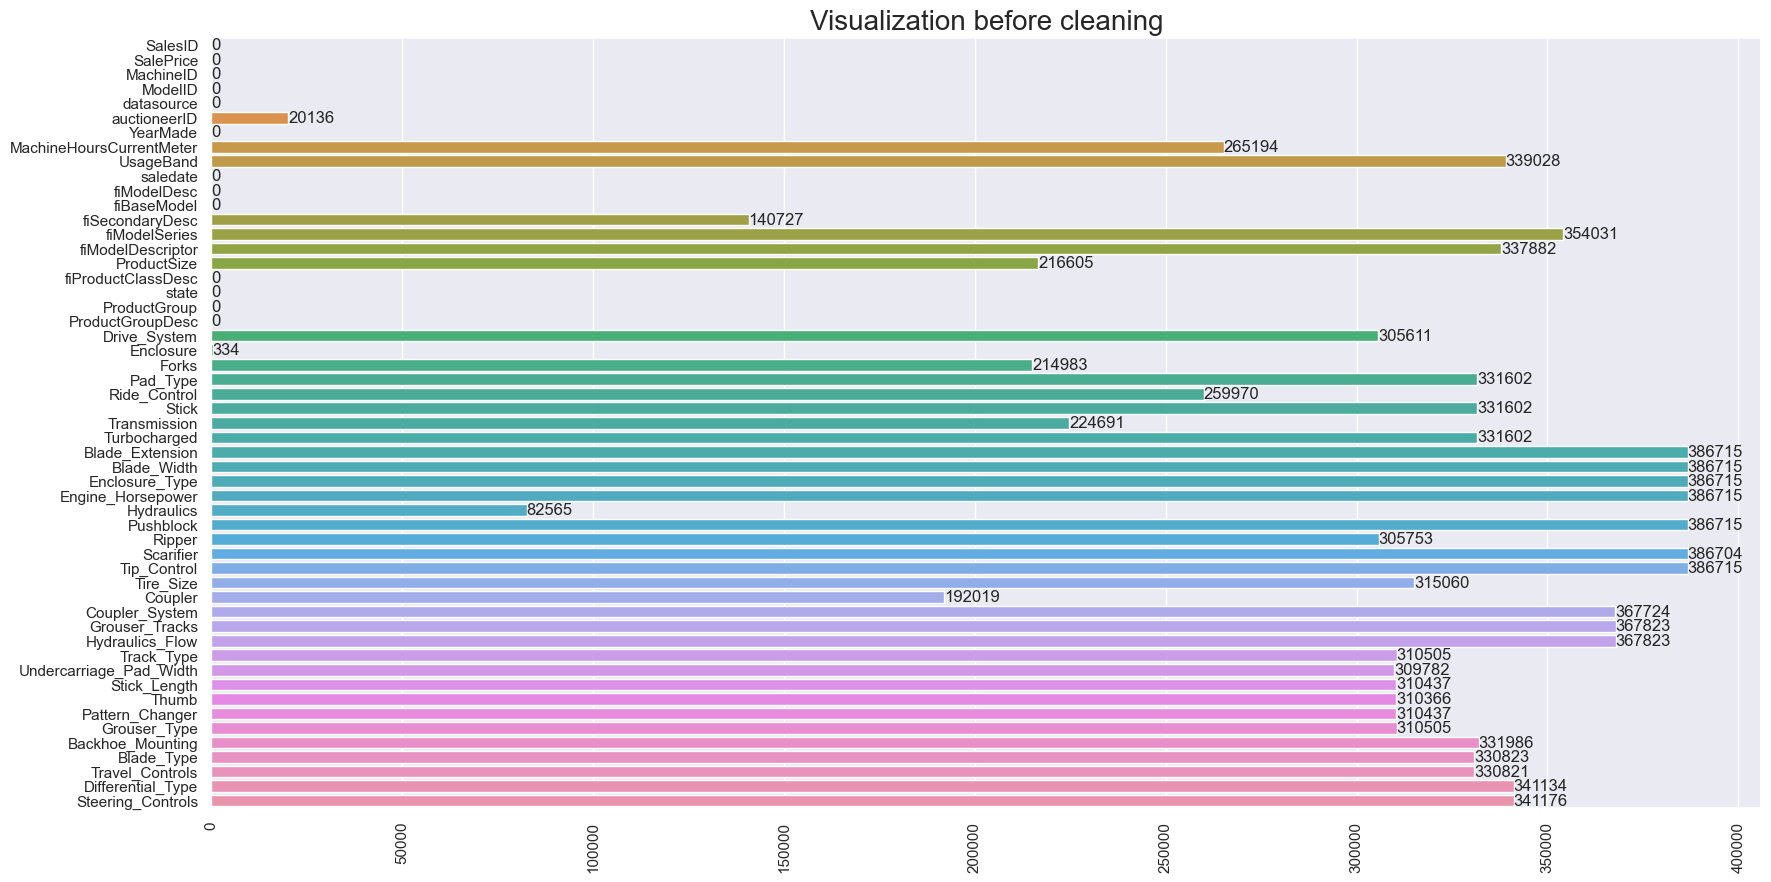

In [42]:
# visualization before cleaning
plt.figure(figsize=(20,10))
plots=sns.barplot(y=df.isna().sum().index,x=df.isna().sum())
plt.xticks(rotation=90)
plt.bar_label(plots.containers[0],rotation=0)
plt.title('Visualization before cleaning',fontsize=20)

In [43]:
df.fillna(method='ffill',inplace=True)

Text(0.5, 1.0, 'After Cleaning')

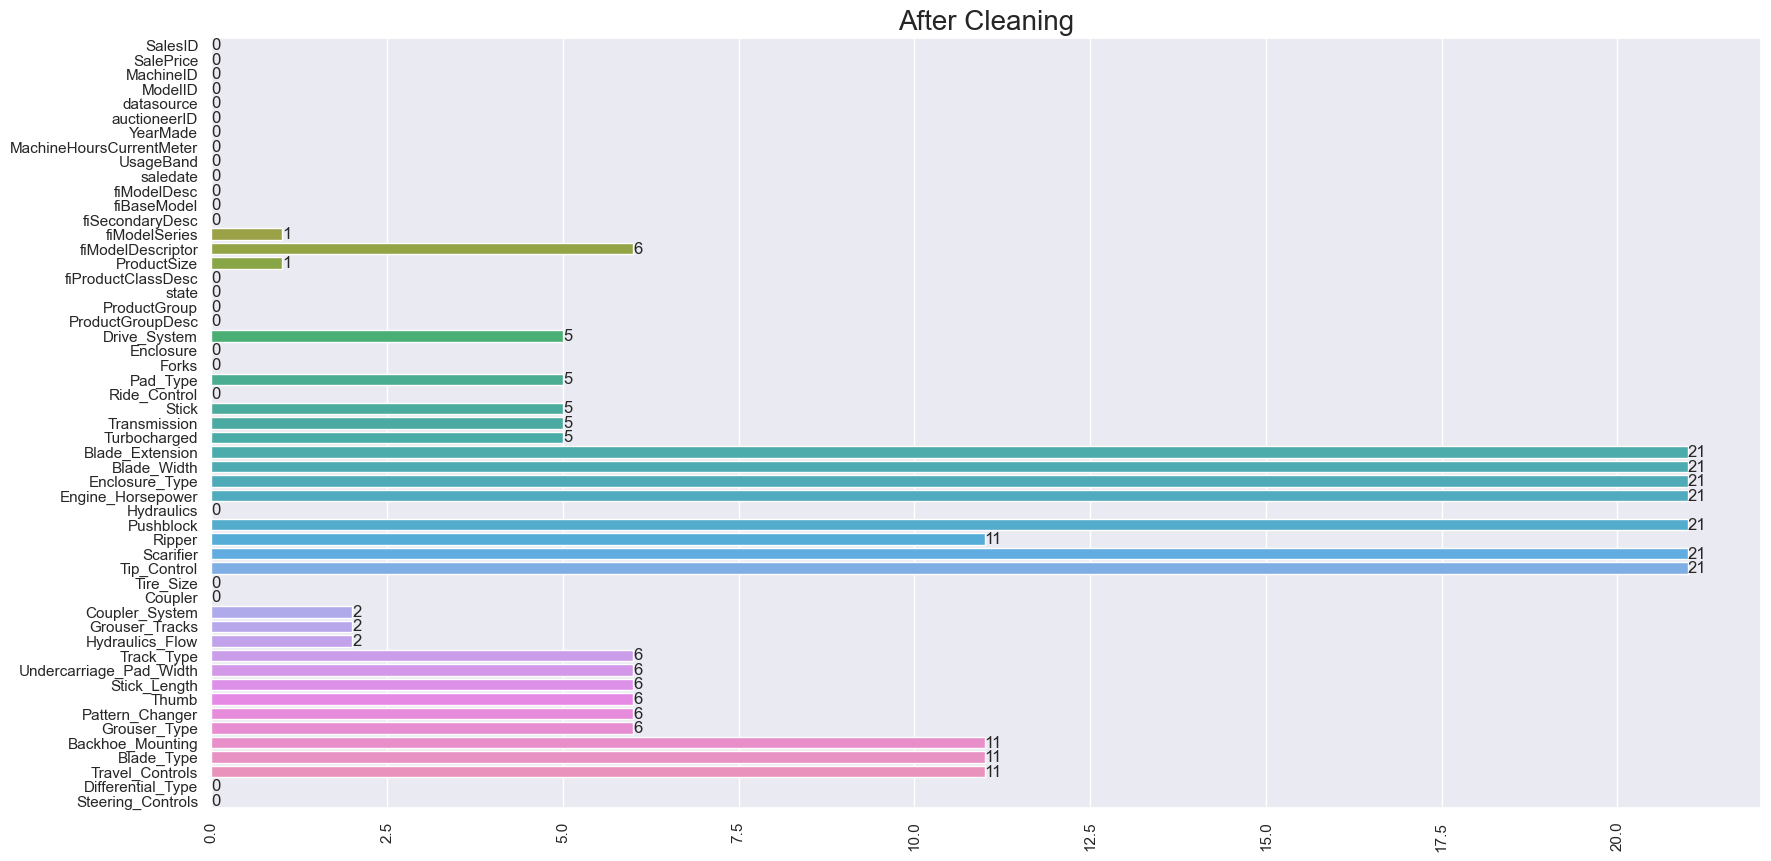

In [44]:
# Visualization after cleaning
plt.figure(figsize=(20,10))
plots=sns.barplot(y=df.isna().sum().index,x=df.isna().sum())
plt.xticks(rotation=90)
plt.bar_label(plots.containers[0],rotation=0)
plt.title('After Cleaning',fontsize=20)

In [45]:
df.dropna(axis=0,how='any')

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
21,1139333,34500.0,999192,3350,121,3.0,1000,16328.0,Medium,10/19/2006 0:00,...,32 inch,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
22,1139344,26000.0,1044500,7040,121,3.0,2005,109.0,Low,10/25/2007 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
23,1139346,73000.0,821452,85,121,3.0,1996,17033.0,High,10/19/2006 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
24,1139348,33000.0,294562,3542,121,3.0,2001,1877.0,Medium,5/20/2004 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
25,1139351,12500.0,833838,7009,121,3.0,2003,1028.0,Medium,3/9/2006 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,PAT,None or Unspecified,Standard,Conventional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412693,6333344,10000.0,1919201,21435,149,2.0,2005,1558.0,Low,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,Straight,None or Unspecified,Standard,Conventional
412694,6333345,10500.0,1882122,21436,149,2.0,2005,1558.0,Low,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,Straight,None or Unspecified,Standard,Conventional
412695,6333347,12500.0,1944213,21435,149,2.0,2005,1558.0,Low,1/28/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,Straight,None or Unspecified,Standard,Conventional
412696,6333348,10000.0,1794518,21435,149,2.0,2006,1558.0,Low,3/7/2012 0:00,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,None or Unspecified,Straight,None or Unspecified,Standard,Conventional


In [46]:
df.isna().sum()

SalesID                      0
SalePrice                    0
MachineID                    0
ModelID                      0
datasource                   0
auctioneerID                 0
YearMade                     0
MachineHoursCurrentMeter     0
UsageBand                    0
saledate                     0
fiModelDesc                  0
fiBaseModel                  0
fiSecondaryDesc              0
fiModelSeries                1
fiModelDescriptor            6
ProductSize                  1
fiProductClassDesc           0
state                        0
ProductGroup                 0
ProductGroupDesc             0
Drive_System                 5
Enclosure                    0
Forks                        0
Pad_Type                     5
Ride_Control                 0
Stick                        5
Transmission                 5
Turbocharged                 5
Blade_Extension             21
Blade_Width                 21
Enclosure_Type              21
Engine_Horsepower           21
Hydrauli

In [47]:
df.select_dtypes(include='object').columns

Index(['UsageBand', 'saledate', 'fiModelDesc', 'fiBaseModel',
       'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [48]:
df.select_dtypes(exclude='object').isnull().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
dtype: int64

In [49]:
df.isnull().sum()

SalesID                      0
SalePrice                    0
MachineID                    0
ModelID                      0
datasource                   0
auctioneerID                 0
YearMade                     0
MachineHoursCurrentMeter     0
UsageBand                    0
saledate                     0
fiModelDesc                  0
fiBaseModel                  0
fiSecondaryDesc              0
fiModelSeries                1
fiModelDescriptor            6
ProductSize                  1
fiProductClassDesc           0
state                        0
ProductGroup                 0
ProductGroupDesc             0
Drive_System                 5
Enclosure                    0
Forks                        0
Pad_Type                     5
Ride_Control                 0
Stick                        5
Transmission                 5
Turbocharged                 5
Blade_Extension             21
Blade_Width                 21
Enclosure_Type              21
Engine_Horsepower           21
Hydrauli

In [50]:
df.dropna(axis=0,inplace=True,how='any')

In [51]:
df.isna().sum()

SalesID                     0
SalePrice                   0
MachineID                   0
ModelID                     0
datasource                  0
auctioneerID                0
YearMade                    0
MachineHoursCurrentMeter    0
UsageBand                   0
saledate                    0
fiModelDesc                 0
fiBaseModel                 0
fiSecondaryDesc             0
fiModelSeries               0
fiModelDescriptor           0
ProductSize                 0
fiProductClassDesc          0
state                       0
ProductGroup                0
ProductGroupDesc            0
Drive_System                0
Enclosure                   0
Forks                       0
Pad_Type                    0
Ride_Control                0
Stick                       0
Transmission                0
Turbocharged                0
Blade_Extension             0
Blade_Width                 0
Enclosure_Type              0
Engine_Horsepower           0
Hydraulics                  0
Pushblock 

C:\Users\DELL\AppData\Local\Temp\ipykernel_9944\998398642.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,2].set_xticklabels(df.Steering_Controls.value_counts().index,rotation=90)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9944\998398642.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,3].set_xticklabels(df.Transmission.value_counts().index,rotation=90)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9944\998398642.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,4].set_xticklabels(df.Undercarriage_Pad_Width.value_counts().index,rotation=90)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9944\998398642.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1,1].set_xticklabels(df.Travel_Controls.value_counts().index,rotation=90)
C:\Users\DELL\AppData\Local\Temp\ipykernel_9944\998398642.py:34: UserWarning: FixedFormatter should only be used 

Text(0.5, 0.98, 'Frequency')

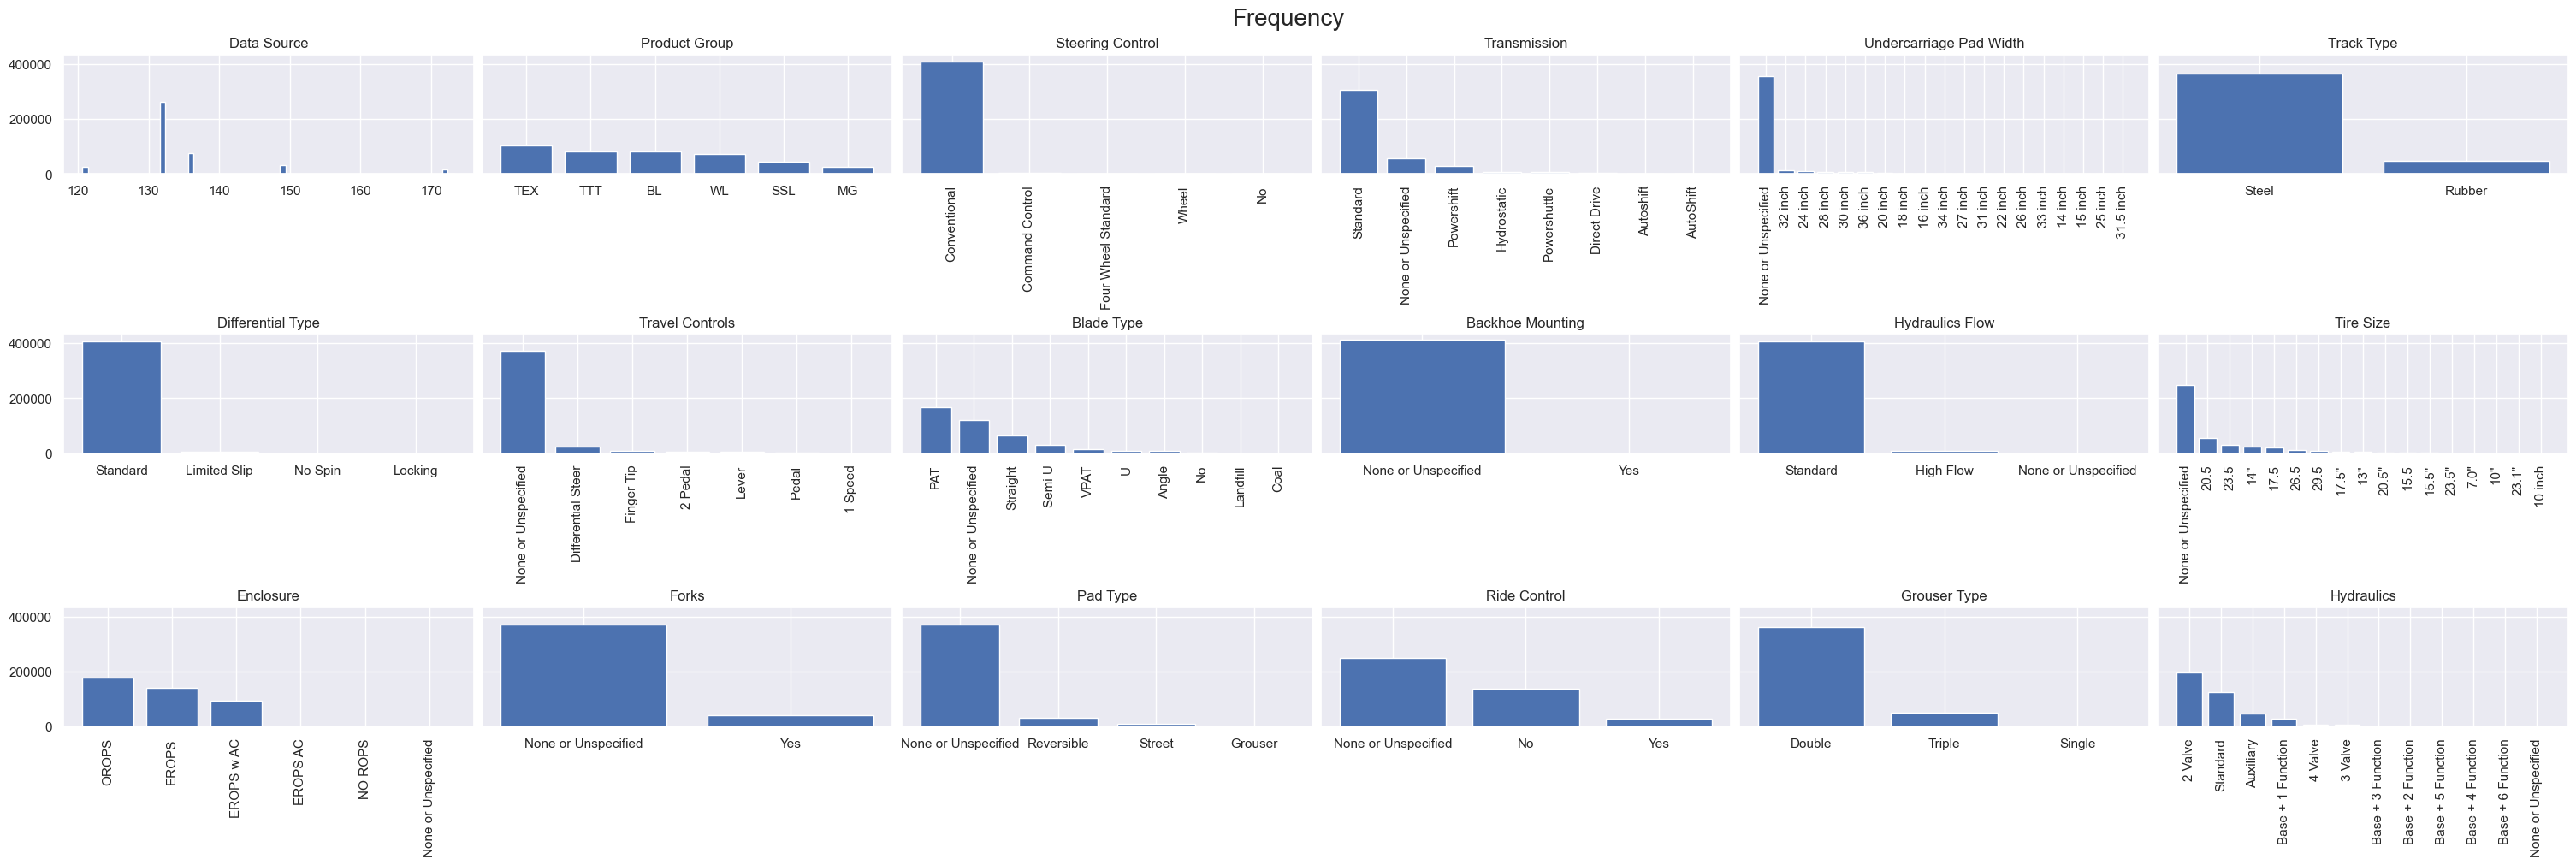

In [52]:
fig, axs = plt.subplots(3, 6, figsize=(30, 10), sharey=True,layout='constrained')
# Data Source
axs[0,0].bar(df.datasource.value_counts().index,df.datasource.value_counts())
axs[0,0].set_title('Data Source') 
# Product Group
axs[0,1].bar(df.ProductGroup.value_counts().index,df.ProductGroup.value_counts())
axs[0,1].set_title('Product Group')
# Sterling controls
axs[0,2].bar(df.Steering_Controls.value_counts().index,df.Steering_Controls.value_counts())
axs[0,2].set_title('Steering Control')
axs[0,2].set_xticklabels(df.Steering_Controls.value_counts().index,rotation=90)
# Transmission
axs[0,3].bar(df.Transmission.value_counts().index,df.Transmission.value_counts())
axs[0,3].set_xticklabels(df.Transmission.value_counts().index,rotation=90)
axs[0,3].set_title('Transmission')
# Undercarriage Pad Width
axs[0,4].bar(df.Undercarriage_Pad_Width.value_counts().index,df.Undercarriage_Pad_Width.value_counts())
axs[0,4].set_xticklabels(df.Undercarriage_Pad_Width.value_counts().index,rotation=90)
axs[0,4].set_title('Undercarriage Pad Width')
# Track Type
axs[0,5].bar(df.Track_Type.value_counts().index,df.Track_Type.value_counts())
axs[0,5].set_title('Track Type')

# Differential Type
axs[1,0].bar(df.Differential_Type.value_counts().index,df.Differential_Type.value_counts())
axs[1,0].set_title('Differential Type')
# Travel Controls
axs[1,1].bar(df.Travel_Controls.value_counts().index,df.Travel_Controls.value_counts())
axs[1,1].set_xticklabels(df.Travel_Controls.value_counts().index,rotation=90)
axs[1,1].set_title('Travel Controls')
# Blade Type
axs[1,2].bar(df.Blade_Type.value_counts().index,df.Blade_Type.value_counts())
axs[1,2].set_title('Blade Type')
axs[1,2].set_xticklabels(df.Blade_Type.value_counts().index,rotation=90)
# Backhoe Mounting
axs[1,3].bar(df.Backhoe_Mounting.value_counts().index,df.Backhoe_Mounting.value_counts())
axs[1,3].set_title('Backhoe Mounting')
# Hydraulics Flow
axs[1,4].bar(df.Hydraulics_Flow.value_counts().index,df.Hydraulics_Flow.value_counts())
axs[1,4].set_title('Hydraulics Flow')
# Tire Size
axs[1,5].bar(df.Tire_Size.value_counts().index,df.Tire_Size.value_counts())
axs[1,5].set_xticklabels(df.Tire_Size.value_counts().index,rotation=90)
axs[1,5].set_title('Tire Size')
# Enclosure
axs[2,0].bar(df.Enclosure.value_counts().index,df.Enclosure.value_counts())
axs[2,0].set_xticklabels(df.Enclosure.value_counts().index,rotation=90)
axs[2,0].set_title('Enclosure')
# Forks
axs[2,1].bar(df.Forks.value_counts().index,df.Forks.value_counts())
axs[2,1].set_title('Forks')
# Pad Type
axs[2,2].bar(df.Pad_Type.value_counts().index,df.Pad_Type.value_counts())
axs[2,2].set_title('Pad Type')
# Ride Control
axs[2,3].bar(df.Ride_Control.value_counts().index,df.Ride_Control.value_counts())
axs[2,3].set_title('Ride Control')
# Grouser Type
axs[2,4].bar(df.Grouser_Type.value_counts().index,df.Grouser_Type.value_counts())
axs[2,4].set_title('Grouser Type')
# Hydraulics
axs[2,5].bar(df.Hydraulics.value_counts().index,df.Hydraulics.value_counts())
axs[2,5].set_xticklabels(df.Hydraulics.value_counts().index,rotation=90)
axs[2,5].set_title('Hydraulics')

fig.suptitle('Frequency', fontsize=20)

C:\Users\DELL\AppData\Local\Temp\ipykernel_9944\2502251767.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0,2].set_xticklabels(df.Stick_Length.value_counts().index,rotation=90)


Text(0.5, 1.0, 'UsageBand')

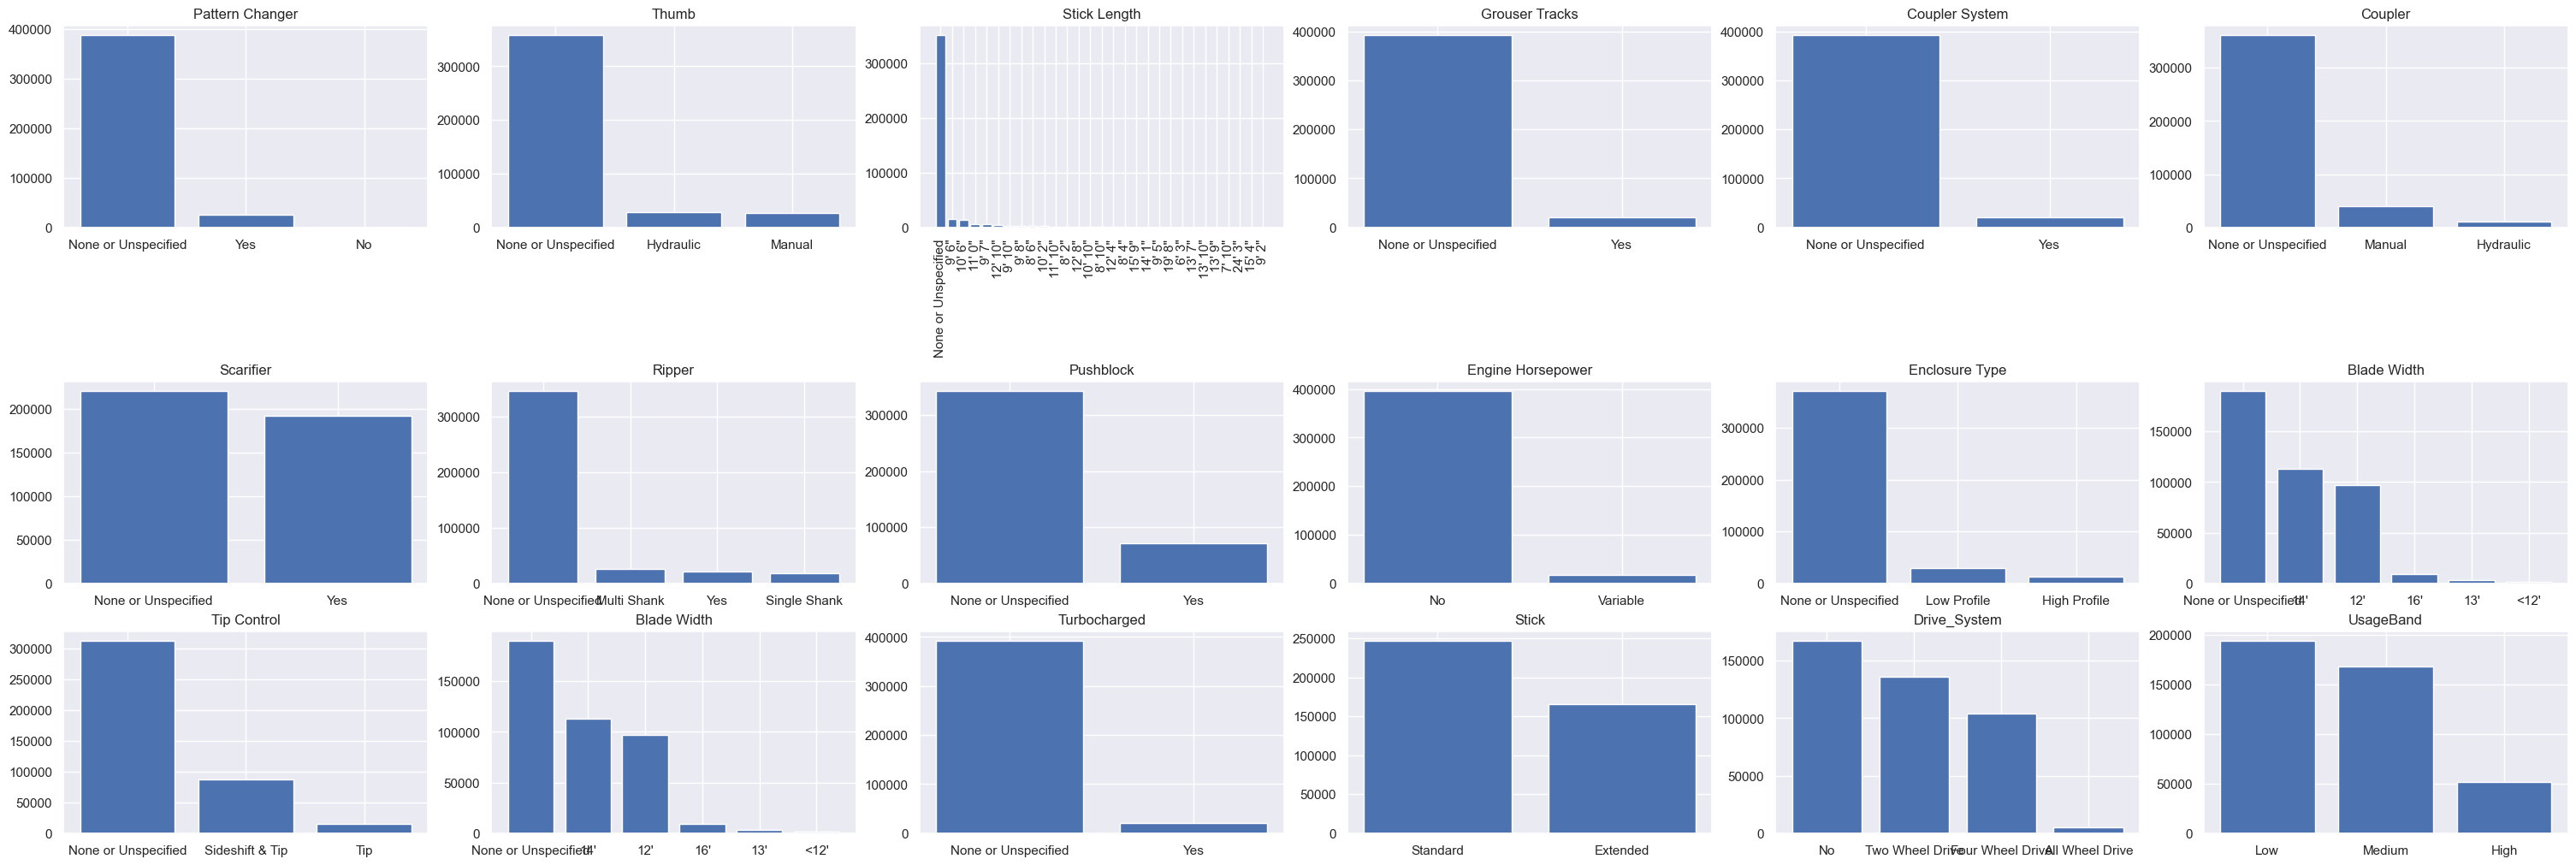

In [53]:
fig, axs= plt.subplots(3,6,figsize=(30,10),layout='constrained')
# Pattern Changer
axs[0,0].bar(df.Pattern_Changer.value_counts().index,df.Pattern_Changer.value_counts())
axs[0,0].set_title('Pattern Changer')
# Thumb
axs[0,1].bar(df.Thumb.value_counts().index,df.Thumb.value_counts())
axs[0,1].set_title('Thumb')
# Stick_Length
axs[0,2].bar(df.Stick_Length.value_counts().index,df.Stick_Length.value_counts())
axs[0,2].set_title('Stick Length')
axs[0,2].set_xticklabels(df.Stick_Length.value_counts().index,rotation=90)
# Grouser Tracks
axs[0,3].bar(df.Grouser_Tracks.value_counts().index,df.Grouser_Tracks.value_counts())
axs[0,3].set_title('Grouser Tracks')
# Coupler System
axs[0,4].bar(df.Coupler_System.value_counts().index,df.Coupler_System.value_counts())
axs[0,4].set_title('Coupler System')
# Coupler
axs[0,5].bar(df.Coupler.value_counts().index,df.Coupler.value_counts())
axs[0,5].set_title('Coupler')

# Scarifier
axs[1,0].bar(df.Scarifier.value_counts().index,df.Scarifier.value_counts())
axs[1,0].set_title('Scarifier')
# Ripper
axs[1,1].bar(df.Ripper.value_counts().index,df.Ripper.value_counts())
axs[1,1].set_title('Ripper')
# Pushblock
axs[1,2].bar(df.Pushblock.value_counts().index,df.Pushblock.value_counts())
axs[1,2].set_title('Pushblock')
# Engine Horsepower
axs[1,3].bar(df.Engine_Horsepower.value_counts().index,df.Engine_Horsepower.value_counts())
axs[1,3].set_title('Engine Horsepower')
# Enclosure Type
axs[1,4].bar(df.Enclosure_Type.value_counts().index,df.Enclosure_Type.value_counts())
axs[1,4].set_title('Enclosure Type')
# Blade Width
axs[1,5].bar(df.Blade_Width.value_counts().index,df.Blade_Width.value_counts())
axs[1,5].set_title('Blade Width')

# Tip Control
axs[2,0].bar(df.Tip_Control.value_counts().index,df.Tip_Control.value_counts())
axs[2,0].set_title('Tip Control')
# Blade Width
axs[2,1].bar(df.Blade_Width.value_counts().index,df.Blade_Width.value_counts())
axs[2,1].set_title('Blade Width')
# Turbocharged
axs[2,2].bar(df.Turbocharged.value_counts().index,df.Turbocharged.value_counts())
axs[2,2].set_title('Turbocharged')
# Stick
axs[2,3].bar(df.Stick.value_counts().index,df.Stick.value_counts())
axs[2,3].set_title('Stick')
# Drive System
axs[2,4].bar(df.Drive_System.value_counts().index,df.Drive_System.value_counts())
axs[2,4].set_title('Drive_System')
# UsageBand
axs[2,5].bar(df.UsageBand.value_counts().index,df.UsageBand.value_counts())
axs[2,5].set_title('UsageBand')
#axs[0,2].set_xticklabels(df.Steering_Controls.value_counts().index,rotation=90)

<Axes: ylabel='state'>

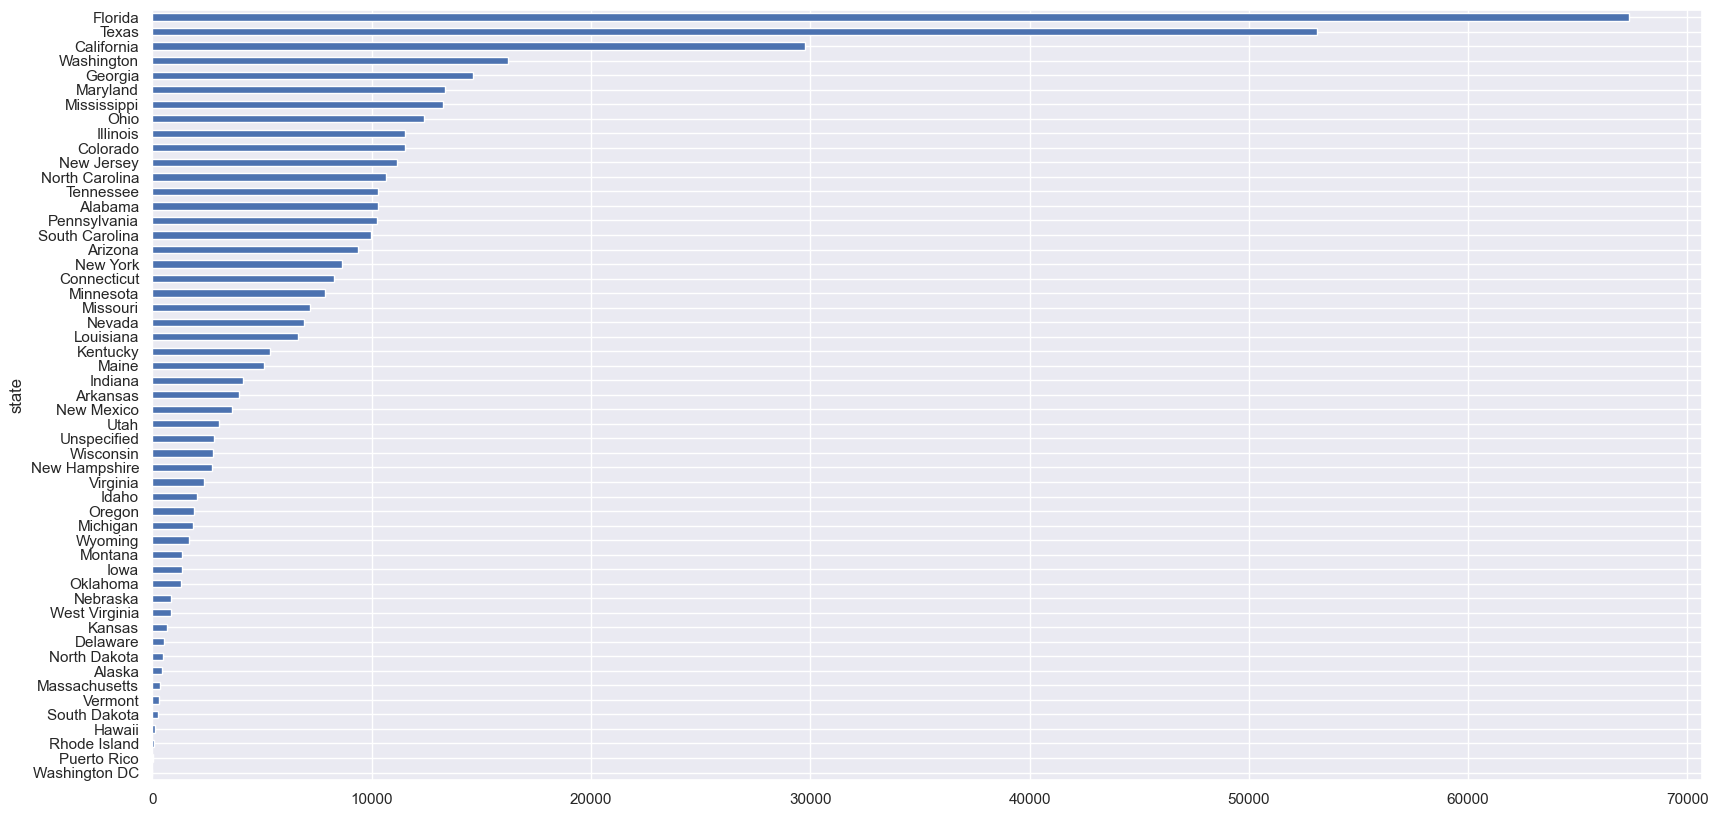

In [54]:
plt.figure(figsize=(20,10))
df.state.value_counts().sort_values().plot(kind='barh')

<Axes: ylabel='ProductSize'>

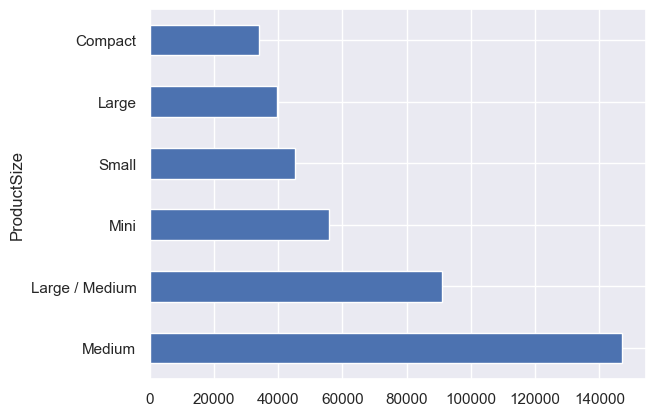

In [55]:
# Product Size
df.ProductSize.value_counts().plot(kind='barh')

<Axes: xlabel='UsageBand'>

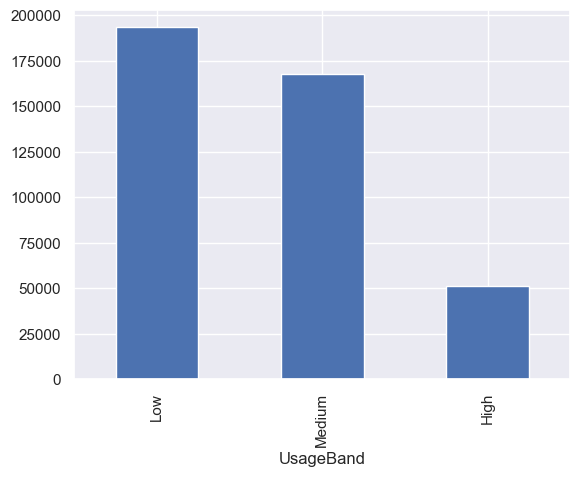

In [56]:
df.UsageBand.value_counts().plot(kind='bar')

In [57]:
#sns.lineplot(data=df,x='saledate',y='UsageBand')

<Axes: xlabel='UsageBand', ylabel='SalePrice'>

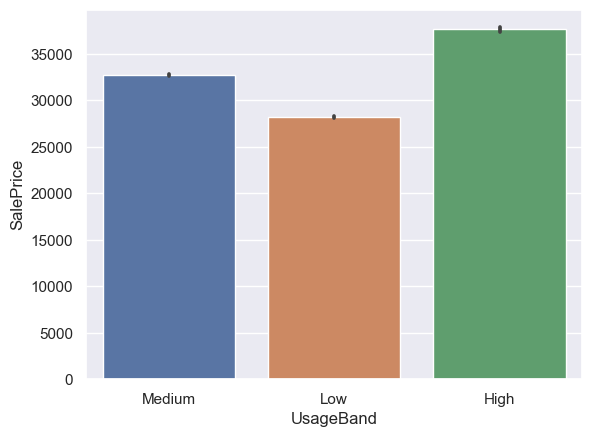

In [58]:
sns.barplot(data=df,x='UsageBand',y='SalePrice')

<Axes: xlabel='state', ylabel='SalePrice'>

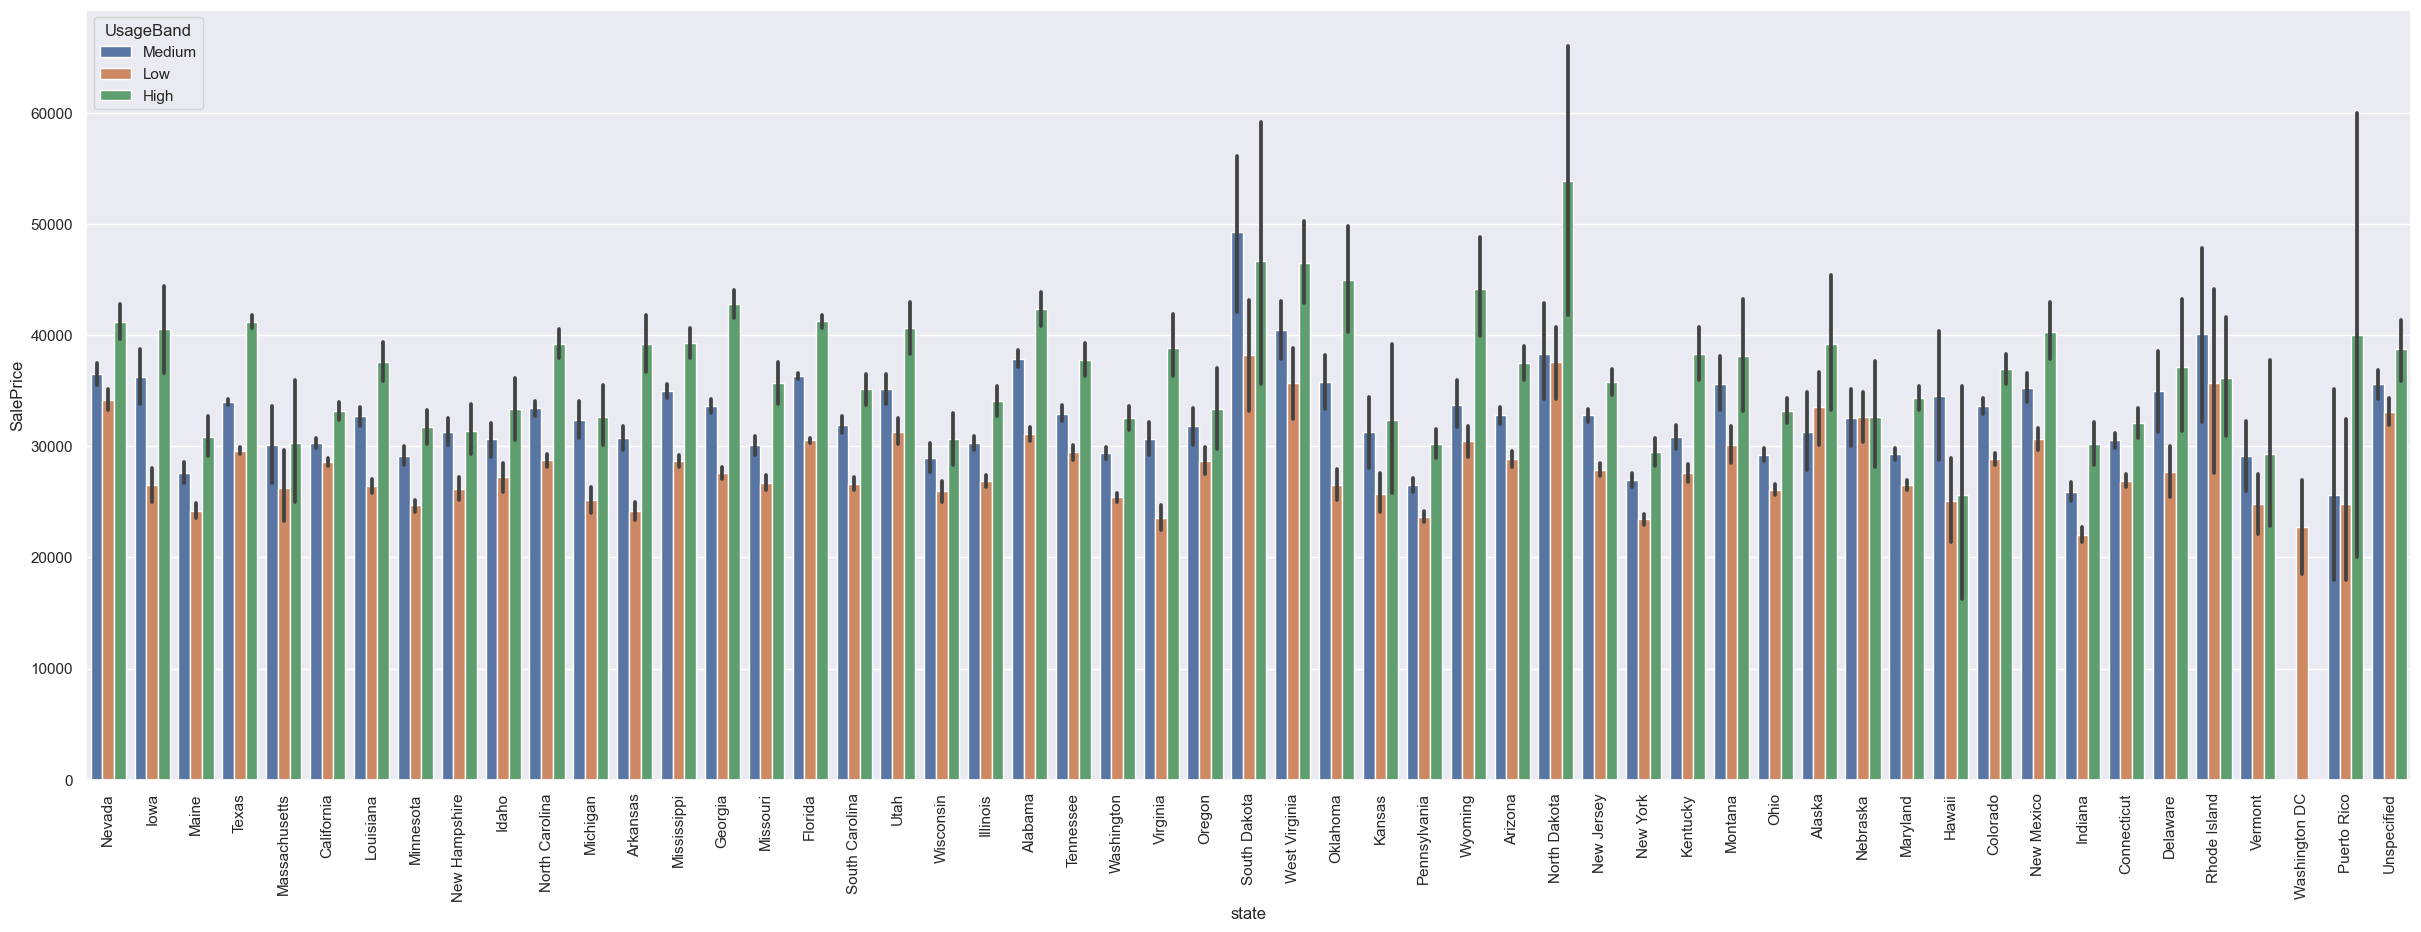

In [59]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(data=df,x='state',y='SalePrice',hue='UsageBand')

<Axes: xlabel='state', ylabel='SalePrice'>

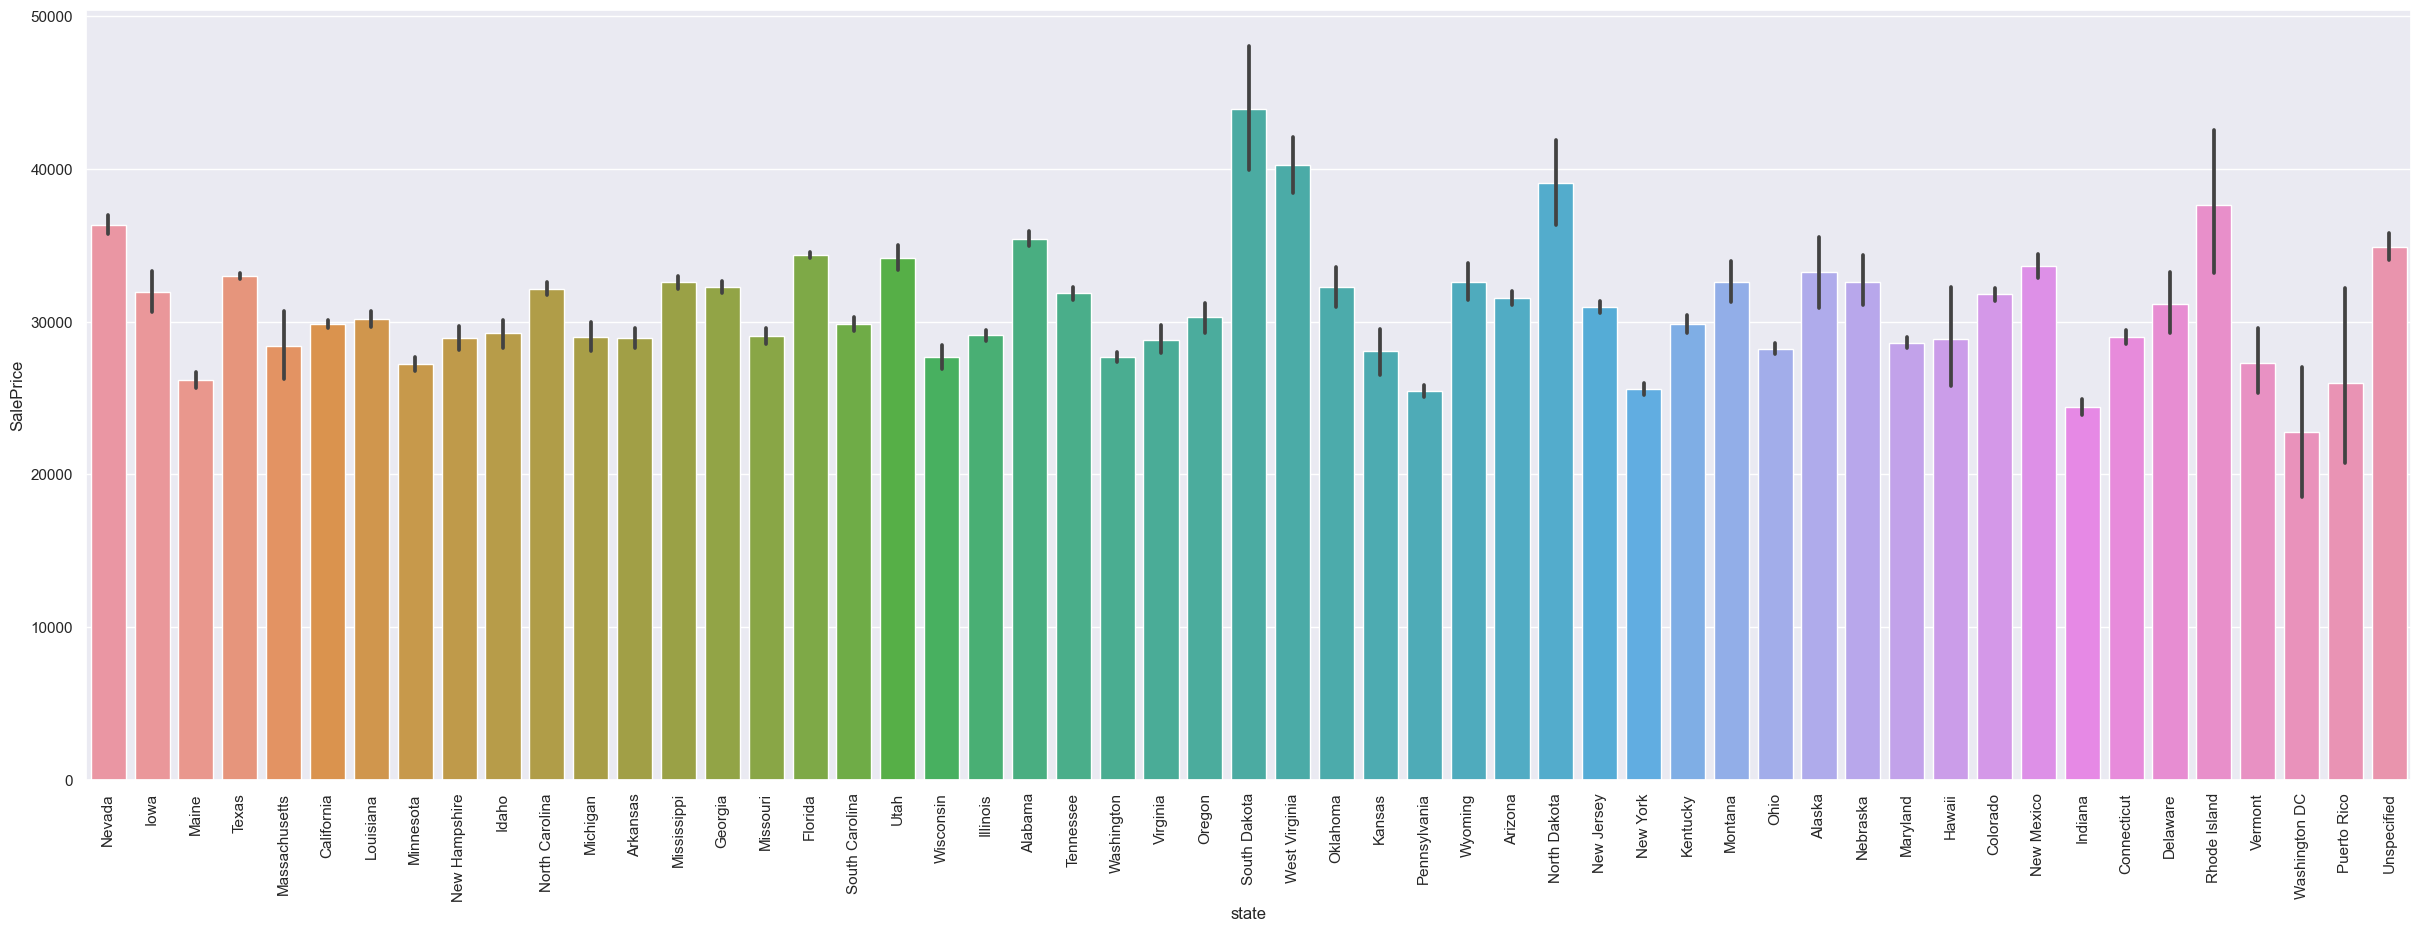

In [60]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(data=df,x='state',y='SalePrice')

<Axes: xlabel='state', ylabel='SalePrice'>

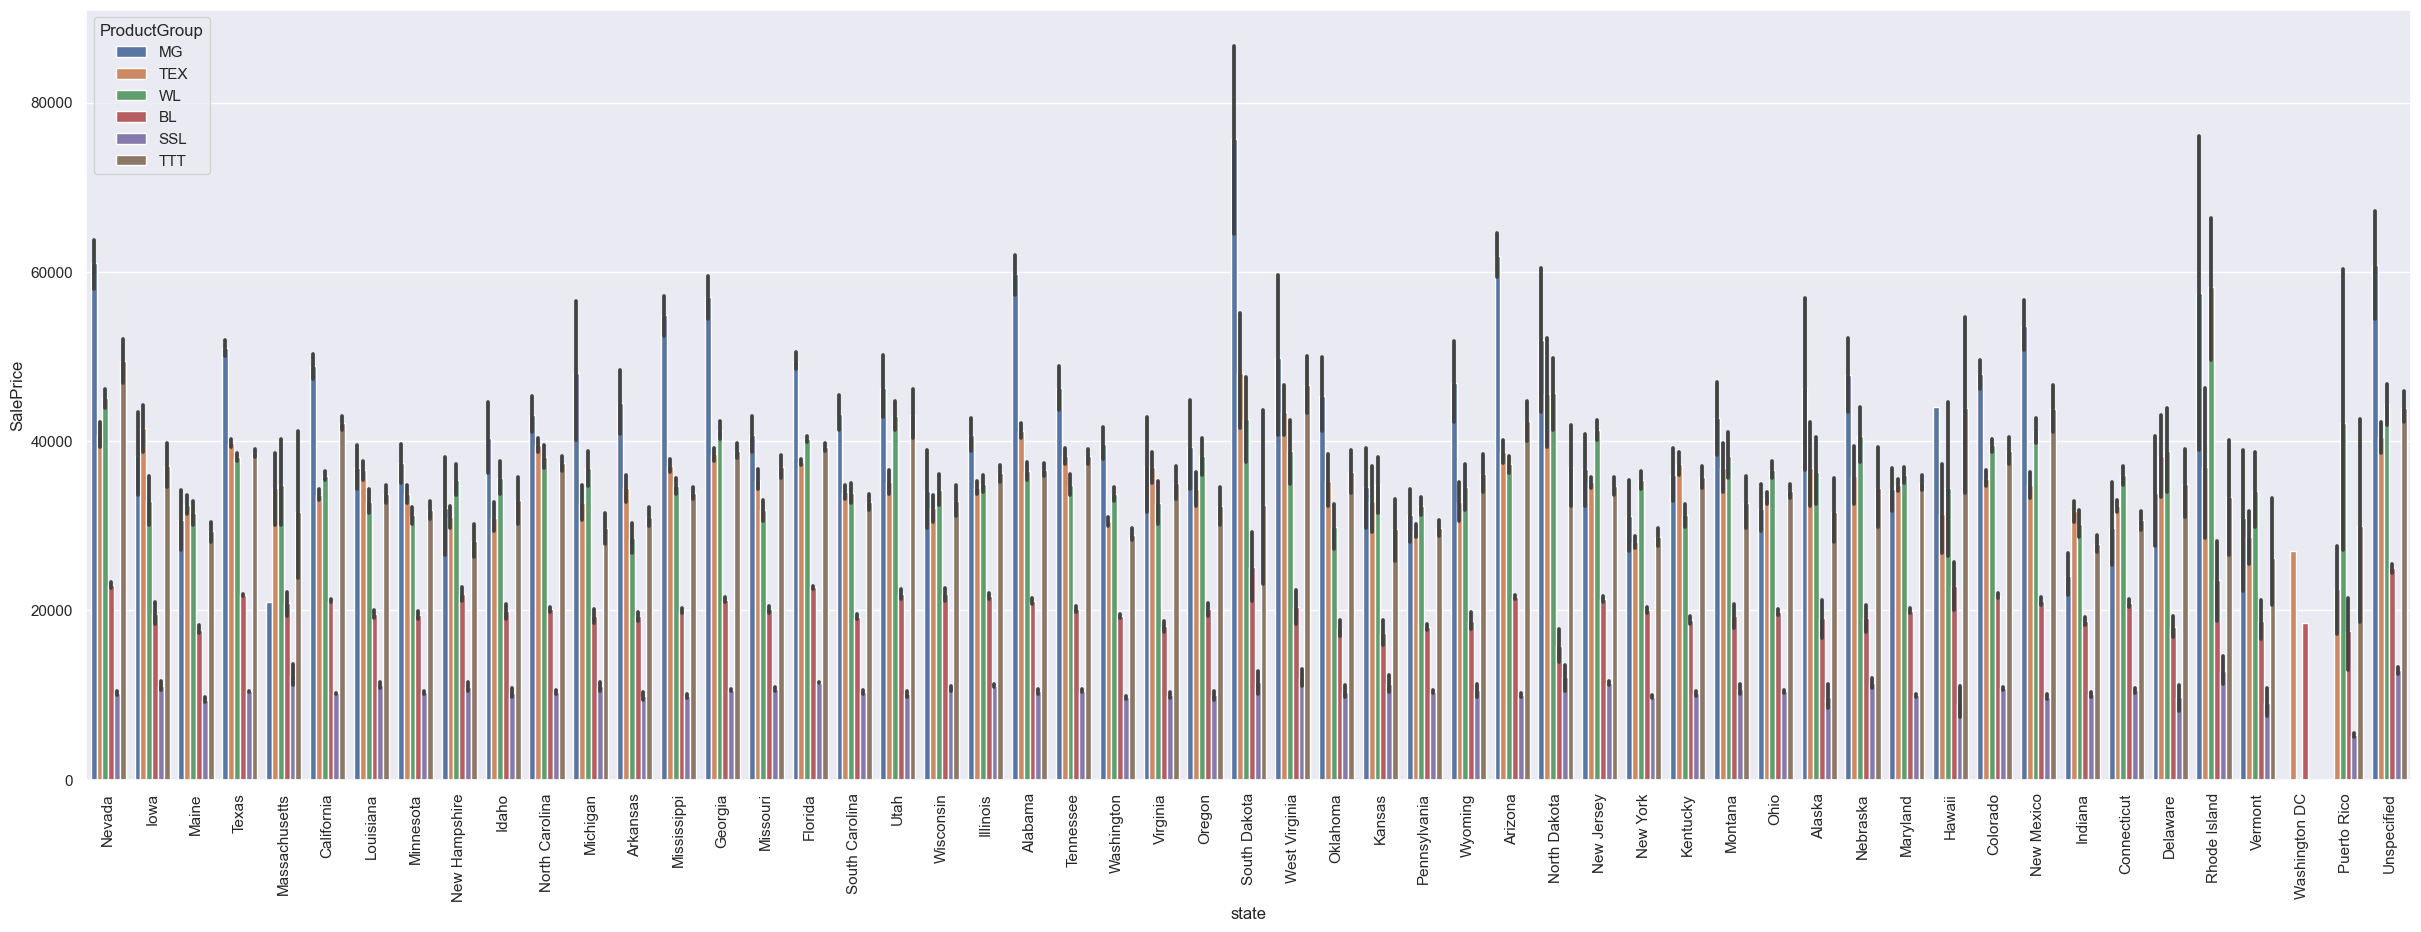

In [61]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
sns.barplot(data=df,x='state',y='SalePrice',hue='ProductGroup')

In [64]:
df['saledate']

21        10/19/2006 0:00
22        10/25/2007 0:00
23        10/19/2006 0:00
24         5/20/2004 0:00
25          3/9/2006 0:00
               ...       
412693      3/7/2012 0:00
412694     1/28/2012 0:00
412695     1/28/2012 0:00
412696      3/7/2012 0:00
412697     1/28/2012 0:00
Name: saledate, Length: 412677, dtype: object

In [68]:
df['saledate']=df.saledate.astype('datetime64[ns]')

In [ ]:
#plt.figure(figsize=(20,10))
#sns.lineplot(data=df,x='saledate',y='SalePrice')

In [69]:
df.saledate

21       2006-10-19
22       2007-10-25
23       2006-10-19
24       2004-05-20
25       2006-03-09
            ...    
412693   2012-03-07
412694   2012-01-28
412695   2012-01-28
412696   2012-03-07
412697   2012-01-28
Name: saledate, Length: 412677, dtype: datetime64[ns]

In [70]:
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [71]:
df.ProductGroupDesc

21             Motor Graders
22          Track Excavators
23              Wheel Loader
24           Backhoe Loaders
25        Skid Steer Loaders
                 ...        
412693      Track Excavators
412694      Track Excavators
412695      Track Excavators
412696      Track Excavators
412697      Track Excavators
Name: ProductGroupDesc, Length: 412677, dtype: object

In [72]:
df.fiModelSeries.nunique()

129

In [74]:
del df['ProductGroupDesc']
del df['fiProductClassDesc']
del df['fiSecondaryDesc']
del df['fiBaseModel']
del df['auctioneerID']
del df['datasource']
del df['SalesID']
del df['MachineID']
del df['ModelID']

KeyError: 'ProductGroupDesc'

In [76]:
x,y=df.drop('SalePrice',axis=1),df['SalePrice']

In [77]:
x=pd.get_dummies(x)

In [78]:
del x['saledate']

In [79]:
x.head()

,YearMade,MachineHoursCurrentMeter,UsageBand_High,UsageBand_Low,UsageBand_Medium,fiModelDesc_100C,fiModelDesc_104,fiModelDesc_1066,fiModelDesc_1066E,fiModelDesc_1080,...,Travel_Controls_Pedal,Differential_Type_Limited Slip,Differential_Type_Locking,Differential_Type_No Spin,Differential_Type_Standard,Steering_Controls_Command Control,Steering_Controls_Conventional,Steering_Controls_Four Wheel Standard,Steering_Controls_No,Steering_Controls_Wheel
21,1000,16328.0,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
22,2005,109.0,False,True,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
23,1996,17033.0,True,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
24,2001,1877.0,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
25,2003,1028.0,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False


In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
model=RandomForestRegressor()
model=model.fit(x_train,y_train)


In [82]:
model.score(x_train,y_train)

0.9638148030964754

In [83]:
y_pred=model.predict(x_test)

In [84]:
print(f'r2_score: {r2_score(y_test,y_pred):.2f}')
print(mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_pred,y_test))

r2_score: 0.80
105268747.48772234
6502.073042484915


In [85]:
data=pd.DataFrame({'Actual':y_test,'Predicted':y_pred,'differences':y_pred-y_test})
data

,Actual,Predicted,differences
189957,27500.0,36003.333333,8503.333333
52530,33000.0,35486.976190,2486.976190
155152,35000.0,35000.000000,0.000000
375587,10000.0,11090.833333,1090.833333
305557,9500.0,23925.000000,14425.000000
...,...,...,...
75227,21500.0,19489.666667,-2010.333333
307932,17500.0,16693.500000,-806.500000
56350,35000.0,41695.262266,6695.262266
334376,10000.0,9132.744048,-867.255952


In [ ]:
(abs(data.differences).mean())

In [86]:
(np.square(data.differences)).mean()

105268747.48772234

In [87]:
pickle.dump(model,open('regressor.pkl','wb'))

In [153]:
feauture_importance=pd.DataFrame(index=x.columns,data=feauture_importance,columns=['feauture_importance']).sort_values('feauture_importance', ascending=False)
feauture_importance.head()

,feauture_importance
Enclosure_EROPS w AC,0.226644
YearMade,0.138202
ProductGroup_SSL,0.062930
ProductSize_Mini,0.051556
ProductGroup_BL,0.044667


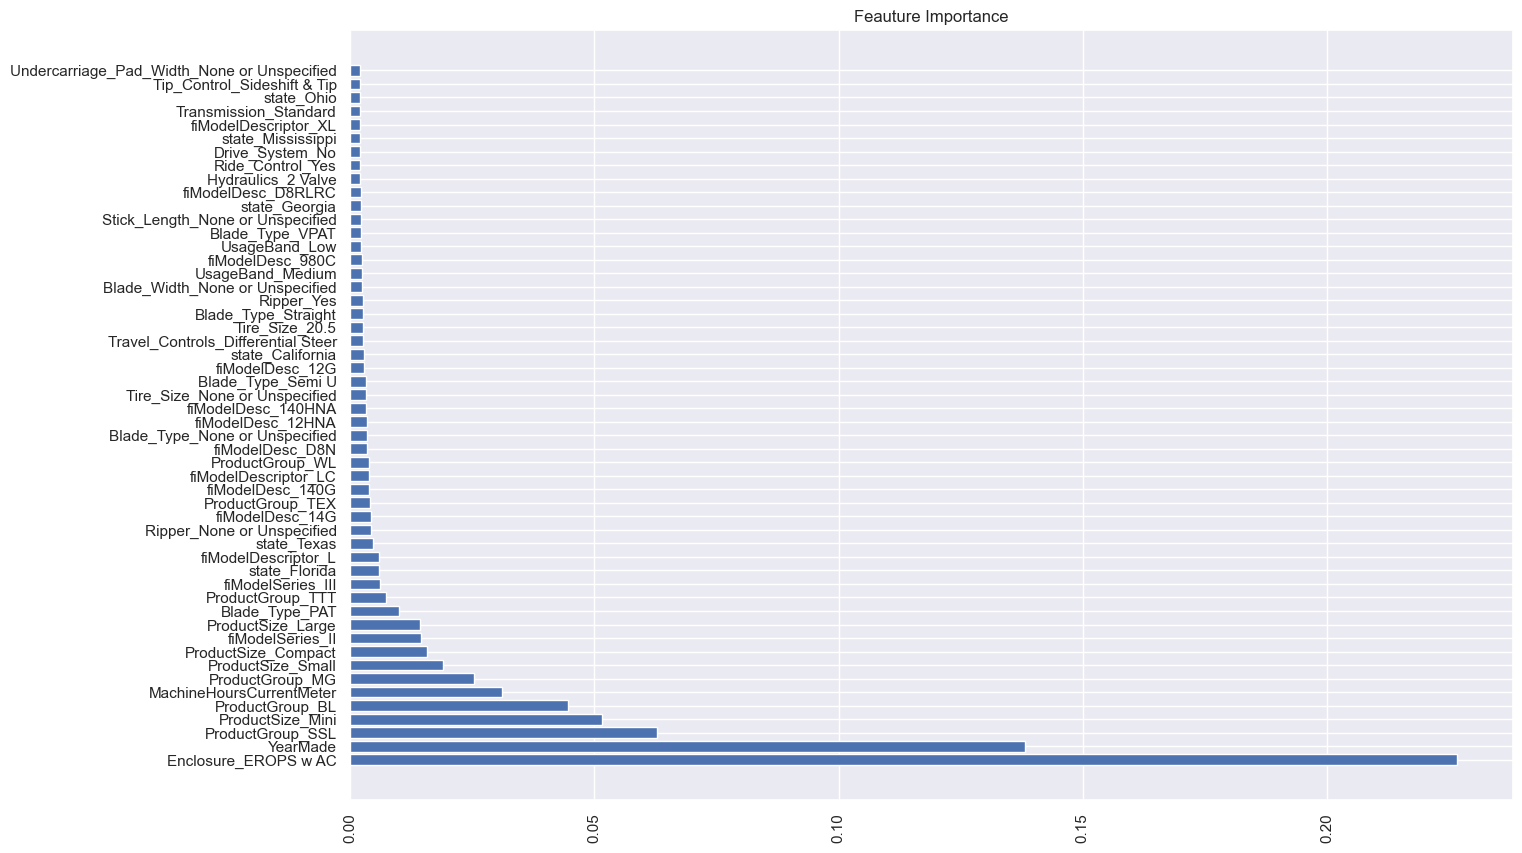

In [160]:
plt.figure(figsize=(15,10))
plt.barh(feauture_importance.index[:52],feauture_importance.feauture_importance[:52])
plt.xticks(rotation=90)
plt.title('Feauture Importance')
plt.show()